In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ml_help
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from time import time
sns.set_theme()

# Load data

In [2]:
flow_df = pd.read_csv("./data/gardiner_flow.csv.zip")
weather_df = pd.read_csv("./data/weather_data.csv.zip")

In [3]:
flow_df["collectedAt"] = pd.to_datetime(flow_df["collectedAt"],utc=True)
weather_df["collectedAt"] = pd.to_datetime(weather_df["collectedAt"],utc=True)

In [4]:
flow_df.drop(['month', 'day', 'day_of_week', 'hour', 'minute'],inplace=True,axis=1)
weather_df.drop(['month', 'day', 'day_of_week', 'day_of_week_name', 'hour', 'minute', 'windDegree'],inplace=True,axis=1)

In [5]:
df = flow_df.merge(weather_df,on="collectedAt",how="inner")
df.head()

,collectedAt,currentSpeed,visibility,temperature,FeelsLike,humidity,windSpeed,cloudsAll,rain1h,snow1h,cloudy,clear,atmosphere,snowy,rainy
0,2022-07-18 15:30:00,94,10.0,21.75,22.46,95,2.57,100,0.0,0.0,1,0,0,0,0
1,2022-07-18 16:10:00,94,10.0,21.90,22.60,94,7.72,100,0.0,0.0,1,0,0,0,0
2,2022-07-18 15:50:00,94,10.0,21.79,22.48,94,7.72,100,0.0,0.0,1,0,0,0,0
3,2022-07-18 16:30:00,94,10.0,22.22,22.90,92,4.63,100,0.0,0.0,1,0,0,0,0
4,2022-07-18 15:35:00,94,10.0,21.71,22.39,94,2.57,100,0.0,0.0,1,0,0,0,0


In [6]:
df["month"] = df.collectedAt.dt.month
df["day_of_week"] = df.collectedAt.dt.weekday
df["hour"] = df.collectedAt.dt.hour
df["minute"] = df.collectedAt.dt.minute
df.drop("collectedAt",inplace=True,axis=1)
df.head()

,currentSpeed,visibility,temperature,FeelsLike,humidity,windSpeed,cloudsAll,rain1h,snow1h,cloudy,clear,atmosphere,snowy,rainy,month,day,day_of_week,hour,minute
0,94,10.0,21.75,22.46,95,2.57,100,0.0,0.0,1,0,0,0,0,7,18,0,15,30
1,94,10.0,21.90,22.60,94,7.72,100,0.0,0.0,1,0,0,0,0,7,18,0,16,10
2,94,10.0,21.79,22.48,94,7.72,100,0.0,0.0,1,0,0,0,0,7,18,0,15,50
3,94,10.0,22.22,22.90,92,4.63,100,0.0,0.0,1,0,0,0,0,7,18,0,16,30
4,94,10.0,21.71,22.39,94,2.57,100,0.0,0.0,1,0,0,0,0,7,18,0,15,35


In [7]:
categorical_attrs = ["month", "day_of_week"]

transformed_df = pd.get_dummies(df, columns=categorical_attrs)
transformed_df = transformed_df.astype("float32")
transformed_df.head()

,currentSpeed,visibility,temperature,FeelsLike,humidity,windSpeed,cloudsAll,rain1h,snow1h,cloudy,...,month_10,month_11,month_12,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6
0,94.0,10.0,21.750000,22.459999,95.0,2.57,100.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,94.0,10.0,21.900000,22.600000,94.0,7.72,100.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,94.0,10.0,21.790001,22.480000,94.0,7.72,100.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,94.0,10.0,22.219999,22.900000,92.0,4.63,100.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,94.0,10.0,21.709999,22.389999,94.0,2.57,100.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
X = transformed_df.drop("currentSpeed",axis=1)
y = transformed_df["currentSpeed"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [9]:
metrics = pd.read_csv("./metrics/044_best_metrics.csv.zip")
metrics

,model,r2,mae,mse,rmse,mape,time_to_fit,time_to_predict
0,XGBoost,0.892797,2.381143,17.746586,4.212670,0.031672,9.752861,0.074639
1,MLP,0.821962,3.375252,29.472815,5.428887,0.044250,92.728774,0.039318
2,Random Forest,0.715822,4.149188,47.043305,6.858812,0.057586,9.398578,0.064393
3,Decision Tree,0.686848,4.222668,51.839746,7.199982,0.058476,0.176527,0.008235


# Load models

## XGBoost

### Run CV

In [10]:
import xgboost as xgb

params = ml_help.params_to_dict("043_xgboost")

In [ ]:
xgboost_pipeline = make_pipeline(StandardScaler(),xgb.XGBRegressor(**params))

xgb_cv_metrics = ml_help.run_stratified_kfold("XGBoost",xgboost_pipeline,X_train,y_train)
xgb_cv_metrics

### Test using previously unseen data

In [11]:
xgboost_pipeline = make_pipeline(StandardScaler(),xgb.XGBRegressor(**params))

start = time()
pipe = xgboost_pipeline.fit(X_train,y_train)
end = time()

y_pred = pipe.predict(X_test)

xgb_metrics = ml_help.get_metrics_reg("XGBoost",y_test,y_pred)
xgb_metrics["time_to_fit"] = end-start
xgb_metrics

{'model': 'XGBoost',
 'r2': 0.901949882767036,
 'mae': 2.2639768,
 'mse': 16.16112,
 'rmse': 4.0200896,
 'mape': 0.03007719,
 'time_to_fit': 11.004825115203857}

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


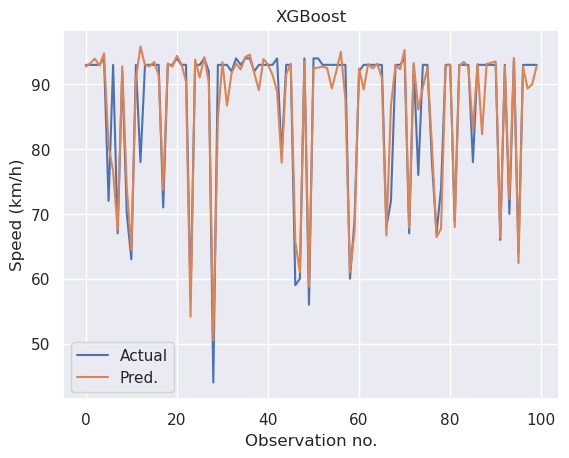

In [12]:
ml_help.plot_prediction(y_test, y_pred, "XGBoost", "Speed (km/h)", "045_xgboost_predictions")

## Random Forest

### Run CV

In [13]:
from sklearn.ensemble import RandomForestRegressor

params = ml_help.params_to_dict("043_random_forest")

In [ ]:
random_forest_pipeline = make_pipeline(StandardScaler(),RandomForestRegressor(**params))

random_forest_cv_metrics = ml_help.run_stratified_kfold("Random Forest",random_forest_pipeline,X_train,y_train)
random_forest_cv_metrics

### Test using previously unseen data

In [14]:
random_forest_pipeline = make_pipeline(StandardScaler(),RandomForestRegressor(**params))

start = time()
pipe = random_forest_pipeline.fit(X_train,y_train)
end = time()

y_pred = pipe.predict(X_test)

random_forest_metrics = ml_help.get_metrics_reg("Random Forest",y_test,y_pred)
random_forest_metrics["time_to_fit"] = end-start
random_forest_metrics

{'model': 'Random Forest',
 'r2': 0.6922053163527111,
 'mae': 4.232842154168272,
 'mse': 50.73228780920602,
 'rmse': 7.122660163815625,
 'mape': 0.059492404954504786,
 'time_to_fit': 13.834661722183228}

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


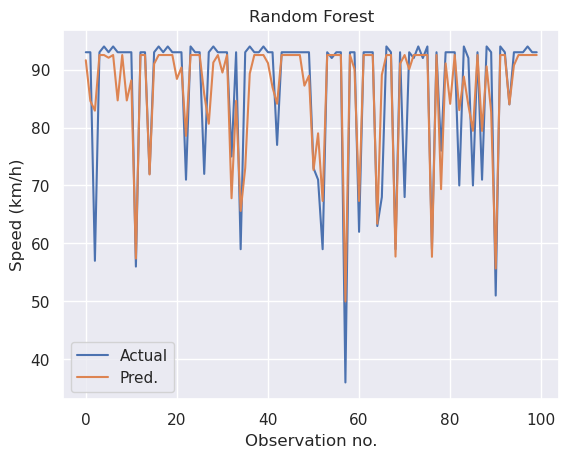

In [15]:
ml_help.plot_prediction(y_test, y_pred, "Random Forest", "Speed (km/h)", "045_random_forest_predictions")

## Decision Tree

### Run CV

In [16]:
from sklearn.tree import DecisionTreeRegressor

params = ml_help.params_to_dict("043_decision_tree")

In [ ]:
decision_tree_pipeline = make_pipeline(StandardScaler(),DecisionTreeRegressor(**params))

dtr_cv_metrics = ml_help.run_stratified_kfold("Decision Tree",decision_tree_pipeline,X_train,y_train)
dtr_cv_metrics

### Test using previously unseen data

In [17]:
decision_tree_pipeline = make_pipeline(StandardScaler(),DecisionTreeRegressor(**params))

start = time()
pipe = decision_tree_pipeline.fit(X_train,y_train)
end = time()

y_pred = pipe.predict(X_test)

dtr_metrics = ml_help.get_metrics_reg("Decision Tree",y_test,y_pred)
dtr_metrics["time_to_fit"] = end-start
dtr_metrics

{'model': 'Decision Tree',
 'r2': 0.6593513488769531,
 'mae': 4.33248341061114,
 'mse': 56.14745293097152,
 'rmse': 7.493160410065403,
 'mape': 0.06101077117003654,
 'time_to_fit': 0.2328195571899414}

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


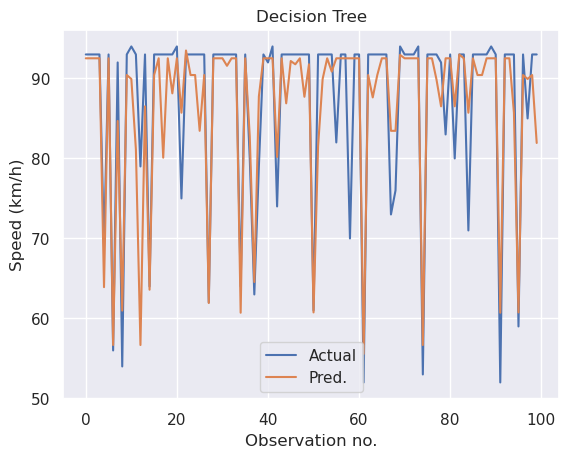

In [18]:
ml_help.plot_prediction(y_test, y_pred, "Decision Tree", "Speed (km/h)", "045_decision_tree_predictions")

## MLP

### Run CV

In [19]:
from sklearn.neural_network import MLPRegressor

params = ml_help.params_to_dict("043_mlpr")

In [ ]:
mlp_pipeline = make_pipeline(StandardScaler(),MLPRegressor(**params))

mlp_cv_metrics = ml_help.run_stratified_kfold("MLP",mlp_pipeline,X_train,y_train)
mlp_cv_metrics

### Test using previously unseen data

In [20]:
mlp_pipeline = make_pipeline(StandardScaler(),MLPRegressor(**params))

start = time()
pipe = mlp_pipeline.fit(X_train,y_train)
end = time()

y_pred = pipe.predict(X_test)

mlp_metrics = ml_help.get_metrics_reg("MLP",y_test,y_pred)
mlp_metrics["time_to_fit"] = end-start
mlp_metrics

{'model': 'MLP',
 'r2': 0.8425562109902973,
 'mae': 3.072641,
 'mse': 25.950687,
 'rmse': 5.0941815,
 'mape': 0.0409637,
 'time_to_fit': 132.22361063957214}

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


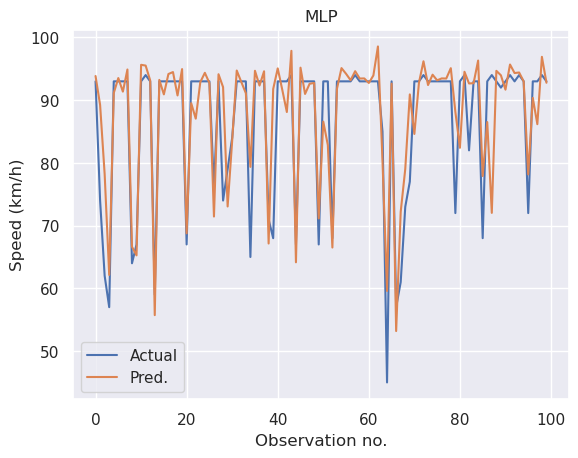

In [21]:
ml_help.plot_prediction(y_test, y_pred, "MLP", "Speed (km/h)", "045_mlp_predictions")

# Store metrics

In [18]:
metrics_cv = pd.concat([pd.DataFrame(xgb_cv_metrics,index=[0]),pd.DataFrame(random_forest_cv_metrics,index=[0]),pd.DataFrame(dtr_cv_metrics,index=[0]),pd.DataFrame(mlp_cv_metrics,index=[0])])
metrics_cv.to_csv("./metrics/045_gardiner_flow_weather_cv_metrics.csv.zip",index=False,compression="zip")

metrics = pd.concat([pd.DataFrame(xgb_metrics,index=[0]),pd.DataFrame(random_forest_metrics,index=[0]),pd.DataFrame(dtr_metrics,index=[0]),pd.DataFrame(mlp_metrics,index=[0])])
metrics.to_csv("./metrics/045_gardiner_flow_weather_metrics.csv.zip",index=False,compression="zip")

# Print CV metrics

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


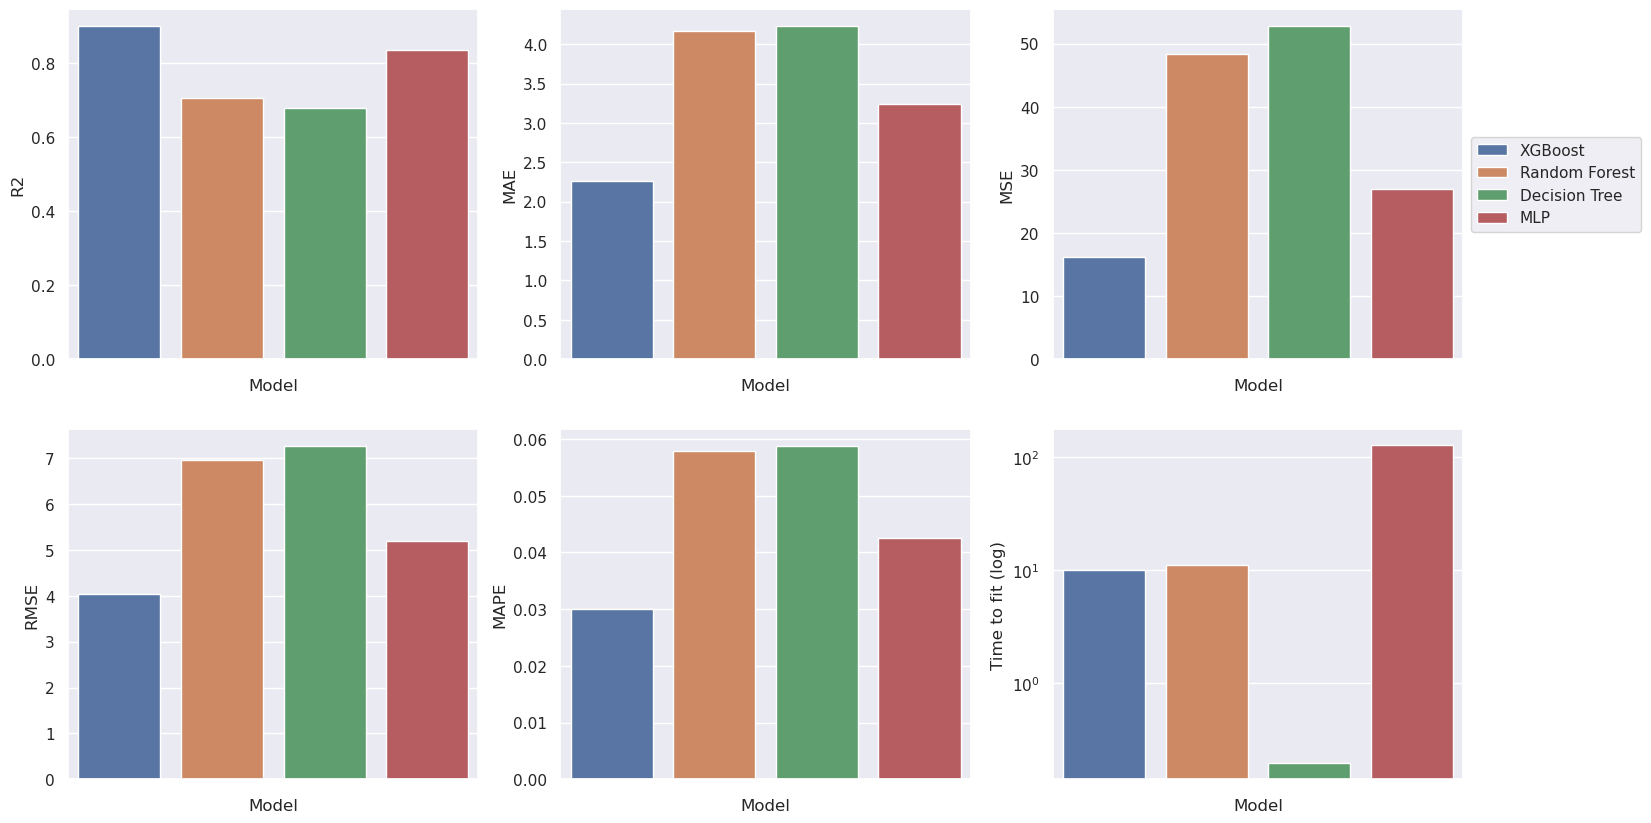

In [19]:
sns.set_theme()

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

sns.barplot(ax=axes[0, 0], data=metrics_cv, x='model', y='r2',hue="model",dodge=False)
sns.barplot(ax=axes[0, 1], data=metrics_cv, x='model', y='mae',hue="model",dodge=False)
sns.barplot(ax=axes[0, 2], data=metrics_cv, x='model', y='mse',hue="model",dodge=False)
sns.barplot(ax=axes[1, 0], data=metrics_cv, x='model', y='rmse',hue="model",dodge=False)
sns.barplot(ax=axes[1, 1], data=metrics_cv, x='model', y='mape',hue="model",dodge=False)
sns.barplot(ax=axes[1, 2], data=metrics_cv, x='model', y='time_to_fit',hue="model",dodge=False)

axes[0, 0].set(xlabel="Model",xticklabels=[])
axes[0, 0].set(ylabel="R2")
axes[0, 0].get_legend().remove()

axes[0, 1].set(xlabel="Model",xticklabels=[])
axes[0, 1].set(ylabel="MAE")
axes[0, 1].get_legend().remove()

axes[0, 2].set(xlabel="Model",xticklabels=[])
axes[0, 2].set(ylabel="MSE")
axes[0, 2].legend(loc='center left', bbox_to_anchor=(1, 0.5))

axes[1, 0].set(xlabel="Model",xticklabels=[])
axes[1, 0].set(ylabel="RMSE")
axes[1, 0].get_legend().remove()

axes[1, 1].set(xlabel="Model",xticklabels=[])
axes[1, 1].set(ylabel="MAPE")
axes[1, 1].get_legend().remove()

axes[1, 2].set(xlabel="Model",xticklabels=[])
axes[1, 2].set(ylabel="Time to fit (log)", yscale="log")
axes[1, 2].get_legend().remove()

plt.savefig("./plots/045_gardiner_flow_weather_cv_metrics.eps",format="eps",bbox_inches="tight")
plt.savefig("./plots/045_gardiner_flow_weather_cv_metrics.png",bbox_inches="tight")

# Print metrics

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


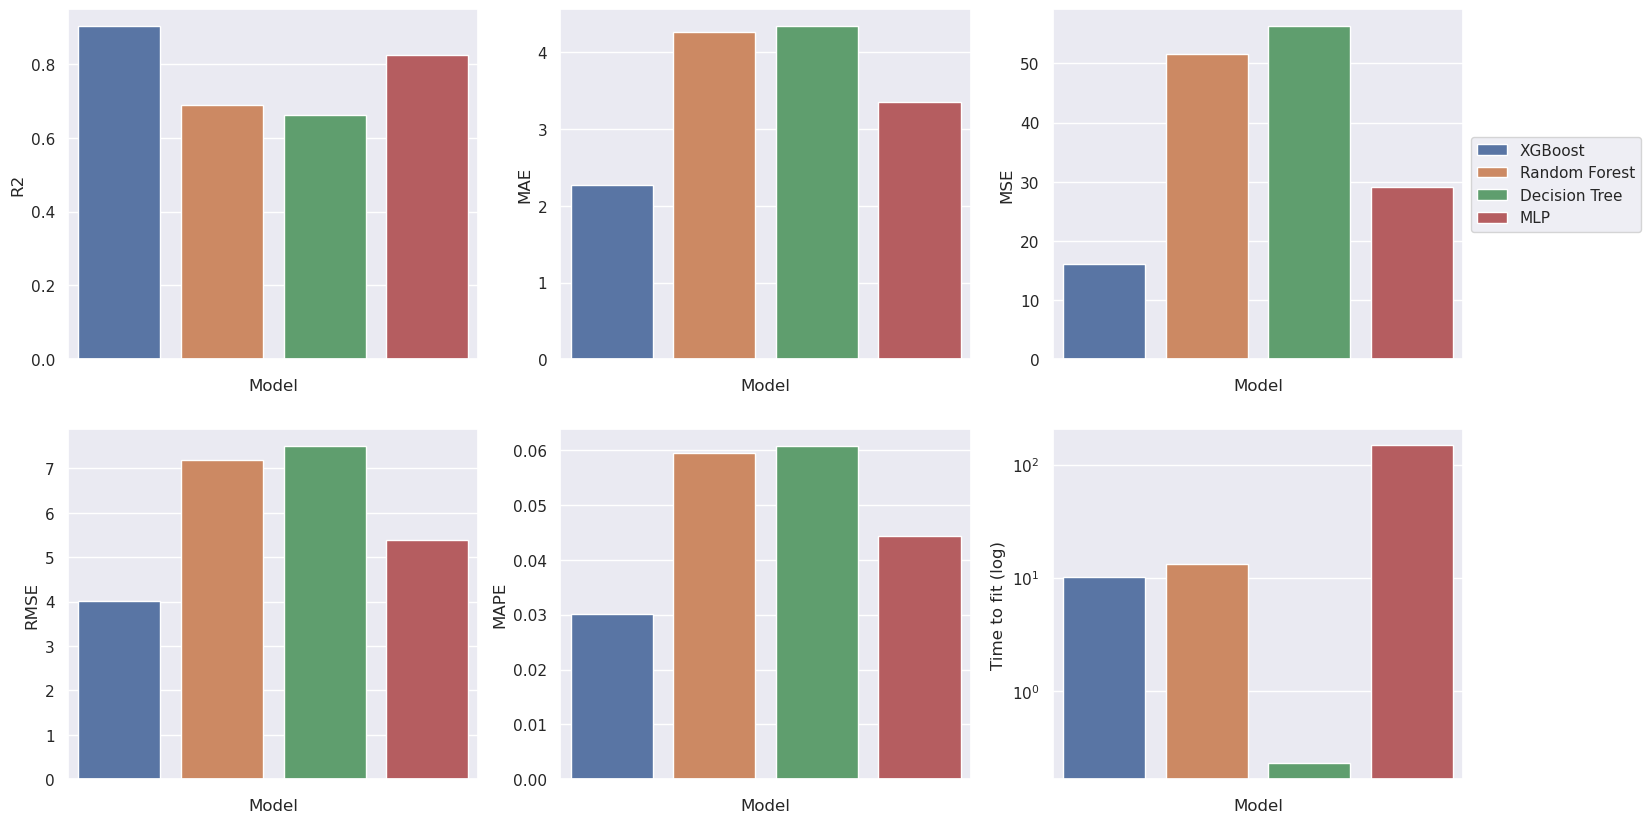

In [20]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

sns.barplot(ax=axes[0, 0], data=metrics, x='model', y='r2',hue="model",dodge=False)
sns.barplot(ax=axes[0, 1], data=metrics, x='model', y='mae',hue="model",dodge=False)
sns.barplot(ax=axes[0, 2], data=metrics, x='model', y='mse',hue="model",dodge=False)
sns.barplot(ax=axes[1, 0], data=metrics, x='model', y='rmse',hue="model",dodge=False)
sns.barplot(ax=axes[1, 1], data=metrics, x='model', y='mape',hue="model",dodge=False)
sns.barplot(ax=axes[1, 2], data=metrics, x='model', y='time_to_fit',hue="model",dodge=False)

axes[0, 0].set(xlabel="Model",xticklabels=[])
axes[0, 0].set(ylabel="R2")
axes[0, 0].get_legend().remove()

axes[0, 1].set(xlabel="Model",xticklabels=[])
axes[0, 1].set(ylabel="MAE")
axes[0, 1].get_legend().remove()

axes[0, 2].set(xlabel="Model",xticklabels=[])
axes[0, 2].set(ylabel="MSE")
axes[0, 2].legend(loc='center left', bbox_to_anchor=(1, 0.5))

axes[1, 0].set(xlabel="Model",xticklabels=[])
axes[1, 0].set(ylabel="RMSE")
axes[1, 0].get_legend().remove()

axes[1, 1].set(xlabel="Model",xticklabels=[])
axes[1, 1].set(ylabel="MAPE")
axes[1, 1].get_legend().remove()

axes[1, 2].set(xlabel="Model",xticklabels=[])
axes[1, 2].set(ylabel="Time to fit (log)", yscale="log")
axes[1, 2].get_legend().remove()

plt.savefig("./plots/045_gardiner_flow_weather_metrics.eps",format="eps",bbox_inches="tight")
plt.savefig("./plots/045_gardiner_flow_weather_metrics.png",bbox_inches="tight")